## kernel Kmeans

#### 王中琦 1120190892

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_data():
    fig = plt.figure()
    x,y1 = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1)
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=y1)
    plt.title("real result")
    plt.show()

    return x


In [3]:
def process(_x):
    '''
    映射到高维核空间
    '''
    Z = np.zeros([100, 3])
    # 二项式映射
    # X[:,0] = _x[:,0]**2
    # X[:, 1] = math.sqrt(2)*_x[:,0]*_x[:,1]
    # X[:,2] = _x[:,1]**2
    
    # 高斯核映射
    Z[:, 0] = np.exp(-(_x[:, 0] ** 2)) * np.exp(-(_x[:, 1] ** 2))
    Z[:, 1] = 2 * _x[:, 0] * _x[:, 1] * np.exp(-(_x[:, 0] ** 2)) * np.exp(-(_x[:, 1] ** 2))
    Z[:, 2] = 2 * _x[:, 0] ** 2 * _x[:, 1] ** 2 * np.exp(-(_x[:, 0] ** 2)) * np.exp(-(_x[:, 1] ** 2))

    return Z


In [4]:
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    X = X.reshape(X.shape[0], -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)

    return distances


In [6]:
class Kmeans():
    def __init__(self, k=2, max_iterations=500, varepsilon=0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon

    # 从所有样本中随机选取self.k样本作为初始的聚类中心
    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    # 返回距离该样本最近的一个中心索引[0, self.k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i

    # 将所有样本进行归类，归类规则就是将该样本归类到与其最近的中心
    def create_clusters(self, centroids, X):
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    # 对中心进行更新
    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # 将所有样本进行归类，其所在的类别的索引就是其类别标签
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    # 对整个数据集X进行Kmeans聚类，返回其聚类的标签
    def predict(self, X):
        # 从所有样本中随机选取self.k样本作为初始的聚类中心
        centroids = self.init_random_centroids(X)

        # 迭代，直到算法收敛(上一次的聚类中心和这一次的聚类中心几乎重合)或者达到最大迭代次数
        for _ in range(self.max_iterations):
            # 将所有进行归类，归类规则就是将该样本归类到与其最近的中心
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids

            # 计算新的聚类中心
            centroids = self.update_centroids(clusters, X)

            # 如果聚类中心几乎没有变化，说明算法已经收敛，退出迭代
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break

        return self.get_cluster_labels(clusters, X)


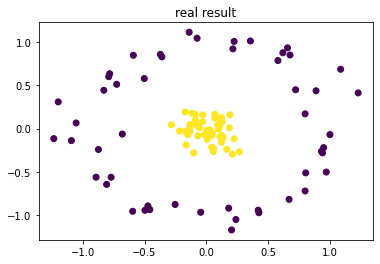

In [7]:
x = get_data()

Text(0.5, 1.0, 'kernel kmeans result')

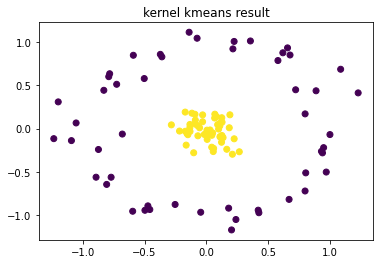

In [8]:
x_kernel = process(x)
kernel_kmeans = Kmeans()
y_pred = kernel_kmeans.predict(x_kernel)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y_pred)
plt.title("kernel kmeans result")